<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_p_85~115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사이킷런 소개와 특징
-  파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공
-  머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 AI기를 제공
-  머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 AI기를 제공

- 사이킷런의 최신 버전인 1.0.2 설치

In [11]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 45.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.18.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [12]:
import sklearn

print(sklearn.__version__)

1.0.2


# 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
-  붓꽃 데이터 세트로 붓꽃의 품종을 분류 （Classification）
-  붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것

- 지도학습 : 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측(즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습 한 뒤 미지의 정답을 예측하는 방식)
- 학습을 위해 주어진 데이터 세트 -> 학습 데이터 세트
- 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트 -> 테스트 데이터 세트로 지칭


- sklearn.datasets : 사이킷런 에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection : 학습 데이터와 검 증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈 의 모임

=> 붓꽃 데이터 세트를 생성 :load_iris(),
    ML 알고리즘 : 의사 결정 트리(DecisionTree), 이를 구현한 DecisionTreeClassifier를 적용, 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 train_test_split() 함수를 사용


In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

- load_iris() 함수를 이용해 붓꽃 데이터  세트를 로딩한 후, 피처들과 데이터  값이  어떻게 구성돼  있는 지  확인하기  위해 DataFrame으로 변환

In [15]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 피처 : sepal length, sepal width, petal length, petal width
- 레이블(Label, 결정값) 은 0, 1, 2 세 가지 값으로 돼 있으며 0이 Setosa 품종, 1 이 versicolor 품종, 2가 virginica 품종을 의미

- 학습용 데이터와 테스트용 데이터를 분리
- test_size=0.2로 입력 파라미터를 설정하면 전체 데이터 중 테스트 데 이터가 20%, 학습 데이터가 80%로 데이터를 분할
- iris_data : 피처 데이터 세트입니다.
- iris_label : 레이블(Label) 데이터 세트
- random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값(수행할 때마다 동일한 데이터 세트로 분리하기 위해 random_ state를 일정한 숫자 값으로 부여)
- 학습용 피처 데이터 세트 : X_train
- 테스트용 피처 데이터 세트 : X_test
- 학습용 레이블 데이터 세트 : y_train
- 테스트용 레이블 데이터 세트 : y_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행

In [20]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

- predict( ) 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [21]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- 정확도 측정을 위해 accuracy_score() 함수를 제공
- accuracy_score()의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력

In [22]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# Estimator 이해 및 fit(), predict() 메서드
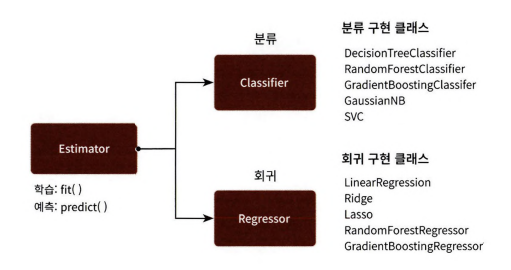

# 내장된 예제 데이터 세트
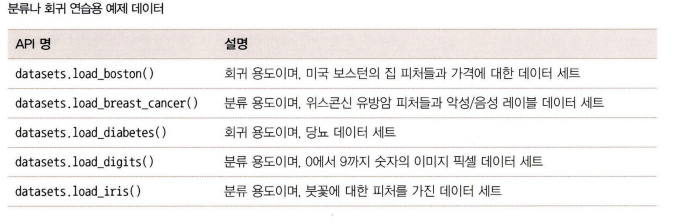

In [23]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


- Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

In [24]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


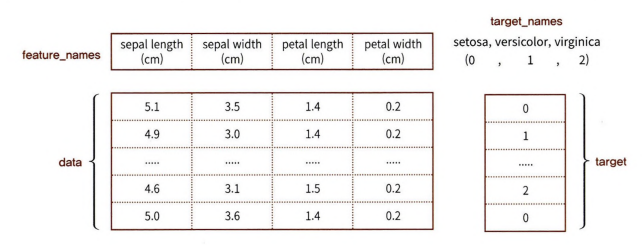

In [26]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print(' feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
 feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 

# 학습/테스트 데이터 세트 분리  - train_test_split


In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


- 위의 예측 결과가 100% 정확한 이유는 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문
- 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아 닌 전용의 테스트 데이터 세트여야 함

- 붓꽃 데이터 세트를 train_test_split() -> 테스트 데이터 세트를 전체의 30%로, 학습 데이터 세 트를 70%로 분리
- 앞의 예제와는 다르게 random_state=121 로 변경

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

In [33]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


- 붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도밖에 되지 않으므로 이를 통해 알 고리즘의 예측 성능을 판단하기에는 그리 적절하지 않음.
- 학습을 위한 데이터의 양을 일정 수준 이 상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 매우 중요

# 교차 검증
- 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

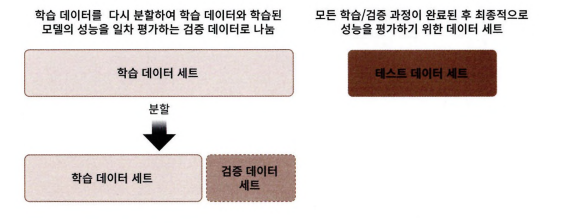

K 폴드 교차 검증
- K개의  데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

-  5 폴드 교차 검증을 수행( 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한 뒤, 이 5개의 평가를 평균한 결과를 가지고 예측 성능을 평가)

- 먼저 데이터 세트를 K등분（5등분）
  그리고 첫 번째 반복에서는 처음부터 4개 등분을 학습 데이터 세트, 마지막 5번째 등분 하나를 검증 데이터 세트로 설정하고 학습 데이터 세트에 서 학습 수행, 검증 데이터 세트에서 평가를 수행
- 첫 번째 평가를 수행하고 나면 이제 두 번째 반복에서 다시 비슷한 학습과 평가 작업을 수행
- 단, 이번에는 학습 데이터와 검증 데이터를 변경（처음부터 3개 등분까지, 그리고 마지막 5번째 등분을 학습 데이터 세트로, 4번째 등분 하나 를 검증 데이터 세트로 설정）

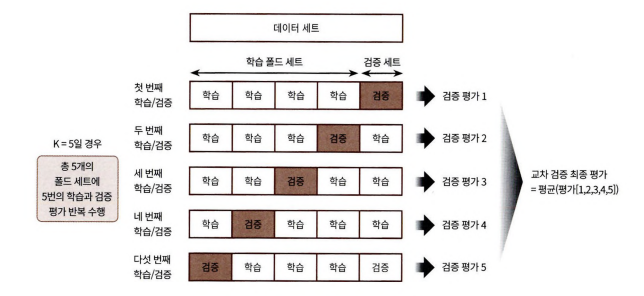

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy=[]
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- 전체 붓꽃 데이터는 모두 150개 -> 학습용 데이터 세트는 이 중 4/5인 120개, 검증 테스트 데이터 세트는 1/5인 30개로 분할

-  5개의 폴드 세트를 생성하는 KFold 객체의 split()을 호출해 교차 검증 수행 시마다 학습과 검증을 반복해 예측 정확도를 측정

In [37]:
n_iter=0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split( )으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  n_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1},학습 데이터 크기: {2}  검증 데이터 크기: {3}'
.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계싼
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0,학습 데이터 크기: 120  검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667,학습 데이터 크기: 120  검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667,학습 데이터 크기: 120  검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333,학습 데이터 크기: 120  검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333,학습 데이터 크기: 120  검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- 첫 번째 교 차 검증에서는 0번 〜 29번까지, 두 번째는 30번 〜 59번, 세 번째는 60번 〜 89번, 네 번째는 90 〜 119번, 다섯 번째는 120 〜 149번으로 각각 30개의 검증 세트 인덱스를 생성했고, 이를 기반으로 검증 세트를 추출

Stratified K 폴드
- 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식

- 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포도를 확인

In [38]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


- 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교 차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인

In [39]:
kfold = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


- 교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출
- 첫 번째 교차 검증에서는 학습 레이블의 1, 2 값이 각각 50개가 추출되었고, 검증 레이블의 0값이 50개 추출됨. 학습 레이블은 1, 2밖에 없으므로 0의 경우는 전혀 학습하지 못함. 반대로 검증 레이블은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못함
 => 이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수밖에 없음

   -> StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하 지 못하는 문제를 해결해 줌

- 동일한 데이터 분할을 StratifiedKFold로 수행하고 학습/ 검증 레이블 데이터의 분포도를 확인
- StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요

In [41]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter+=1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


- 출력 결과를 보면 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음을 알 수 있음
- 첫 번째 교차 검증에서 100개의 학습 레이블은 0, 1, 2 값이 각각 34, 33, 33개로, 레이블 값별로 거의 동일하게 할당됐고, 50개의 검증 레이블 역시 0, 1, 2 값이 각각 17, 17, 16개로, 레이블 값별로 거의 동일하게 할당됨

-  StratifiedKFold를 이용해 데이터를 분리
- 피처 데이터와 레이블 데이터는 앞 의 붓꽃 StratifiedKFold 예제에서 추출한 데이터를 그대로 이용

In [43]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]
  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter+=1
  accuracy = np.round(accuracy_score(y_test, pred),4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계싼
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('\## 평균 검증별 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
\## 평균 검증별 정확도: 0.9667


# 교차 검증을 보다 간편하게 一 cross_val_score()
- 1. 폴드 세트를 설 정하고
- 2.  for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤
- 3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환

 => 이런 일련의 과정을 한꺼번에 수행


- 교차 검증 폴드 수는 3, 성능 평가 지표는 정확도인 accuracy로 함

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증별 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증별 정확도: 0.9667


# GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
- Classifier나 Regressor와 같은 알고리즘에 사용되는 하이 퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

In [45]:
grid_parameters = {'max_depth': [1, 2, 3],
                   'min_depth': [2,3]
                   }

- 하이퍼 파라미터는 다음과 같이 순차적으로 적용되며, 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실 행하면서 최적의 파라미터와 수행 결과를 도출

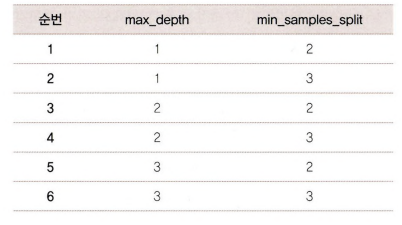

-  train_test_split()을 이용해 학습 데이터와 테스트 데이터를 먼저 분리
- 학습 데이터에서 GridSearchCV()를 이용해 최적 하이퍼 파라미터를 추출
- 결정 트리 알고리즘을 구현한 DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_samples_split의 값을 변화 시키면서 최적화를 진행
- 테스트할 하이퍼 파라미터 세트는 딕셔너리 형태로 하이퍼 파라미 터의 명칭은 문자열 Key 값으로, 하이퍼 파라미터의 값은 리스트 형으로 설정

In [46]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

In [47]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
# ## refit=True가 default임.True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- 'params' 칼럼에는 수행할 때마다 적용된 하이퍼 파라미터값을 가지고 있음
- 맨 마지막에서 두 번째 행（인덱스 번호: 4)을 보면 ‘rank_test_score’ 칼럼 값이 1
- 이는 해당 하이퍼 파라미터의 조합인 max_
depth：3,  min_samples_split：
2로 평가한 결과 예측 성능이  1위라는 의미
- 맨 마지막 행인 인덱스 번호 5번도 rank_ test_score값이 1 인데, mean_test_score 값이 0.975000으로 공동 1위라는 의미

In [48]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


- 이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데 이터 세트에 대해 예측하고 성능을 평가

In [49]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_
# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트  데이터  세트  정확도:  {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트  데이터  세트  정확도:  0.9667
